# Задание

### Основная часть

* Попробовать построить графики из тех, что были на уроке по Seaborn и Matplotlib
* Важно чтобы у каждого из графиков был как минимум один в комментариях или markdown

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head(10)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.00,0.0,0.000000e+00,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.00,0.0,3.272937e+03,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.00,0.0,6.249755e+03,6,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,854.670000,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.00,0.0,1.435494e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.00,0.0,9.151177e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562
5,72,М,Mega,50,0.0,0.0,0.00,0.0,9.369080e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,2433.644326
6,46,NaN,<100,81,0.0,0.0,0.00,0.0,5.350795e+03,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,177.408546
7,62,NaN,<100,56,0.0,0.0,0.00,0.0,4.783591e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,1284.357885
8,39,NaN,100-500,13,0.0,0.0,0.00,0.0,2.919013e+06,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,17397.286761
9,36,М,<100,154,0.0,0.0,32413.52,0.0,0.000000e+00,83,...,32413.52,34119.49,38051.374167,0.0,0.0,0.0,NaN,3915.032892,4.383411,6065.052515


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [3]:
df1 = df.groupby('gender')['income'].max()
df2 = df.groupby('city_type')['income'].max()

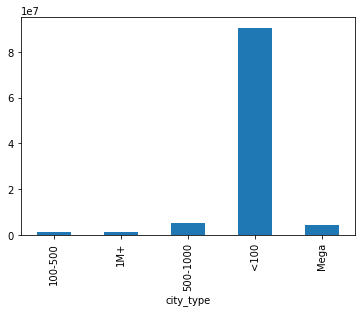

In [4]:
df2.plot(kind='bar')
plt.show()

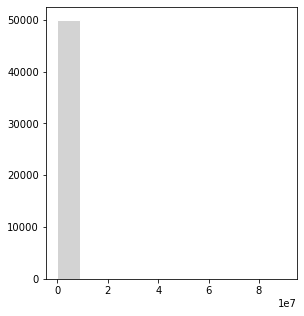

In [5]:
from pylab import rcParams
city = df.set_index('city_type')['income']
rcParams['figure.figsize']= 4.5,5
plt.hist(city, ec='white', color='lightgrey')
plt.show()

<AxesSubplot:xlabel='age'>

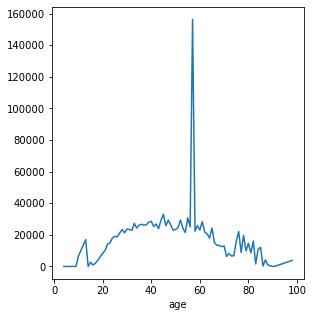

In [6]:
df3 = df.groupby('age')['income'].mean()
df3.plot()

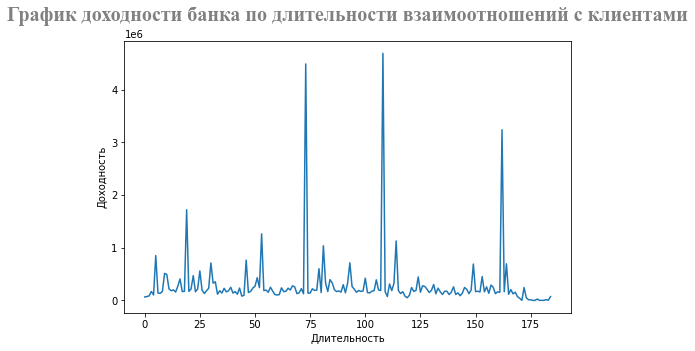

In [37]:
income = df.groupby('full_mob')['nbi'].max().reset_index()
rcParams['figure.figsize']= 8,5

sns.lineplot(x=income.index, y=income['nbi'], palette=2 )
title_dict = {'fontsize':20, 
              'fontweight':'bold',
              'color':'#808080',
             'family':'Times New Roman'}
plt.title('График доходности банка по длительности взаимоотношений с клиентами', fontdict=title_dict, pad=20 )
plt.xlabel('Длительность')
plt.ylabel('Доходность')
plt.show()

In [19]:
income_ = df.groupby('full_mob')['loan_balance_0m'].max().reset_index()
rcParams['figure.figsize']= 8,5

sns.lineplot(x=income.index, y=income['nbi'], palette=2 )
title_dict = {'fontsize':20, 
              'fontweight':'bold',
              'color':'#808080',
             'family':'Times New Roman'}
plt.title('График доходности банка по длительности взаимоотношений с клиентами', fontdict=title_dict, pad=20 )
plt.xlabel('Длительность')
plt.ylabel('Доходность')
plt.show()

,full_mob,nbi
0,0,65782.090000
1,1,73374.034893
2,2,86476.857730
3,3,169551.142660
4,4,103649.430230
...,...,...
180,183,NaN
181,185,1258.368424
182,195,15557.549849
183,214,3613.478354


In [51]:
df.city_type.unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

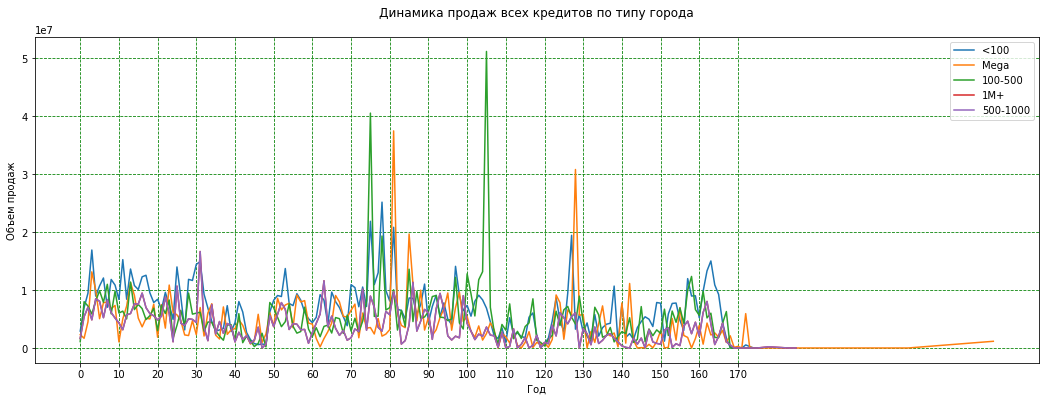

In [44]:
data1 = df[df['city_type'] == '<100'].groupby('full_mob').agg('sum')['loan_balance_0m']
data2 = df[df['city_type'] == 'Mega'].groupby('full_mob').agg('sum')['loan_balance_0m']
data3 = df[df['city_type'] == '100-500'].groupby('full_mob').agg('sum')['loan_balance_0m']
data4 = df[df['city_type'] == '1M+'].groupby('full_mob').agg('sum')['loan_balance_0m']
data5 = df[df['city_type'] == '500-1000'].groupby('full_mob').agg('sum')['loan_balance_0m']

x_range = list(range(int(data1.index.min()), int(data1.index.max()) + 1, 10))
# x_range.append(int(data1.index.max()))
               
fig, ax = plt.subplots(figsize = (18, 6))
ax.plot(data1, label='<100')
ax.plot(data2, label='Mega')
ax.plot(data3, label='100-500')
ax.plot(data4, label='1M+')
ax.plot(data4, label='500-1000')
ax.set_title('Динамика продаж всех кредитов по типу города', pad=20)
ax.set_xlabel('Дней')
ax.set_ylabel('Объем продаж')
ax.set_xticks(x_range)
ax.grid(visible=0.5, color='green', linestyle='--')
ax.legend()
plt.show()

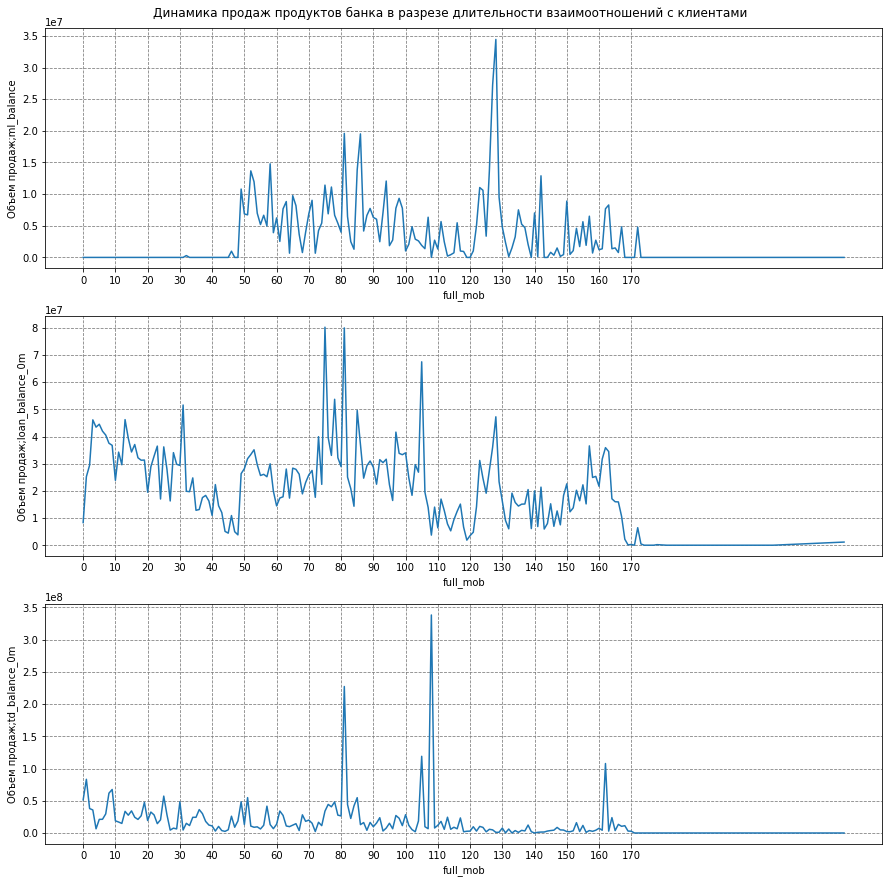

In [50]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize = (15, 15))
prod = ['ml_balance', 'loan_balance_0m', 'td_balance_0m']
data = df.groupby('full_mob')[['ml_balance', 'loan_balance_0m', 'td_balance_0m']].sum()
for i, coun in enumerate(prod):
    ax = axs[i]
    sns.lineplot(data=data, x='full_mob', y=coun, ax=ax)
    
    ax.grid(color='gray', linestyle='--')
    ax.set_ylabel('Объем продаж;' + coun)
    
    ax.set_xticks(x_range)
    

fig.suptitle('Динамика продаж продуктов банка в разрезе длительности взаимоотношений с клиентами', y = 0.9)


plt.show()